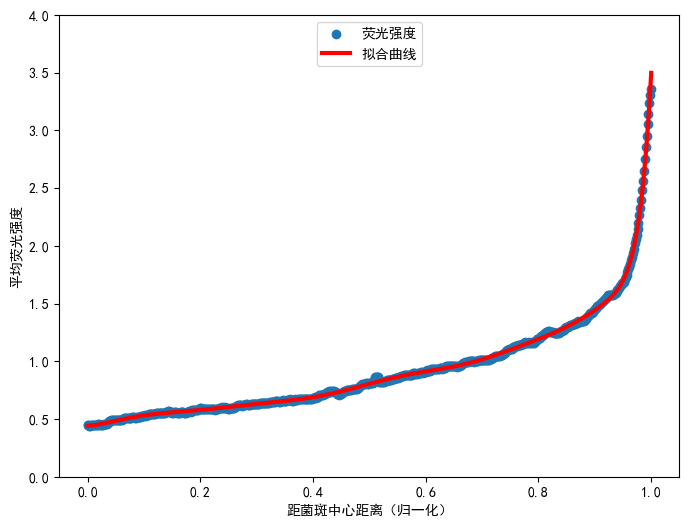

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
im = Image.open('image.PNG')
img = np.array(im)

height, width = img.shape[0:2]
x_collector = []
for j in range(width):
    y_collector = []
    for i in range(height):
        if (img[i, j] == [101, 193, 72, 255]).all():
            y_collector.append(height - i)
    x_collector.append(np.mean(y_collector))

# for _ in range(40):
#     x_collector.append(x_collector[-1])
y = np.array(x_collector[::-1]) / 100
x = np.linspace(0, y.size / width, y.size)

fx = np.poly1d(np.polyfit(x, y, 14))

fig, ax = plt.subplots(figsize=(8,6))
xp = np.linspace(0, 1, width)
ax.plot(x, y, '.', markersize=12, label='荧光强度')
ax.plot(xp, fx(xp), '-', linewidth=3, label='拟合曲线', color='red')
ax.set_ylim(-0, 4)
ax.set_xlabel('距菌斑中心距离（归一化）')
ax.set_ylabel('平均荧光强度')
plt.legend(loc='upper center')
plt.show()

In [2]:
ans = fx(0.75)